In [11]:
%matplotlib inline 

import networkx as nx
import json
import os
from pprint import pprint

print(os.listdir())

['.DS_Store', 'Data Extraction.ipynb', 'roads.json.txt', 'incidents_part1_part2.csv', 'Kmeans Intersection.ipynb', '.ipynb_checkpoints', 'nodes.json.txt', 'Node View.ipynb']


In [12]:
my_nodes = json.load(open('roads.json.txt'))


In [13]:
my_nodes['features'][0]['geometry']['coordinates'][0]

[-75.1714019, 39.961589]

In [14]:
len(my_nodes['features'])

709

In [15]:
len(my_nodes['features'][2]['geometry']['coordinates'])

67

In [16]:
# for i in range(len(my_nodes['features'])):
#     for j in range(len(my_nodes['features'][i]['geometry']['coordinates'])):
#                    print(my_nodes['features'][i]['geometry']['coordinates'][j])

In [17]:
node_js = {}
counter = 0
for i in range(len(my_nodes['features'])):
    for j in range(round(len(my_nodes['features'][i]['geometry']['coordinates'])/30)):
        node_js[counter] = my_nodes['features'][i]['geometry']['coordinates'][j]
        counter += 1

In [18]:
for key in my_nodes:
    print(key)

type
name
crs
features


In [19]:
node_js

{0: [-75.1714019, 39.961589],
 1: [-75.1672215, 39.9733972],
 2: [-75.1763786, 39.9723175],
 3: [-75.1763163, 39.9723058],
 4: [-75.1564124, 39.9604169],
 5: [-75.1553418, 39.9727251],
 6: [-75.1705273, 39.9736269],
 7: [-75.1704021, 39.9750346],
 8: [-75.1857397, 39.9793625],
 9: [-75.1846999, 39.979224],
 10: [-75.1455589, 39.975638],
 11: [-75.1463409, 39.975741],
 12: [-75.1405653, 39.9726329],
 13: [-75.141445, 39.9724807],
 14: [-75.1646614, 39.9629107],
 15: [-75.1645653, 39.9633506],
 16: [-75.1553418, 39.9727251],
 17: [-75.1493443, 39.9853975],
 18: [-75.1494394, 39.9849618],
 19: [-75.1498099, 39.961504],
 20: [-75.1452899, 39.97707],
 21: [-75.1541403, 39.9708451],
 22: [-75.1595699, 39.960755],
 23: [-75.1595414, 39.9608853],
 24: [-75.1595051, 39.9610518],
 25: [-75.1578702, 39.9786738],
 26: [-75.1672215, 39.9733972],
 27: [-75.1724805, 39.9806148],
 28: [-75.175027, 39.984013],
 29: [-75.1674391, 39.9842183],
 30: [-75.1647689, 39.992055],
 31: [-75.1659719, 39.971607],

In [20]:
# js = {'a':'b', 'c':[10, 20], 'd':{'f':'k', 'l':'m'}}

G=nx.Graph()
for key in js.keys():
    G.add_edge('ROOT',key)

def walk(node):
    for key, item in node.items():
        if isinstance(item, list):
            for i in item:
                G.add_edge(key,i)
        if isinstance(item, dict):
            for j in item.keys():
                G.add_edge(key,j)
            walk(item)
        elif isinstance(item,str):
            G.add_edge(key,item)

walk(node_js)

NameError: name 'js' is not defined

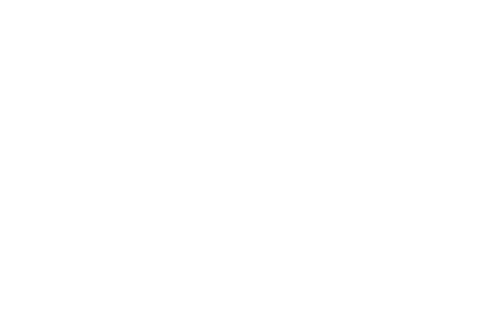

In [21]:
nx.draw(G,with_labels=False)

In [22]:
my_nodes['features'][1]['geometry']['coordinates'][1][1]

39.9725099

In [23]:
node_js = {}
lng_list = []
lat_list = []
counter = 0
for i in range(len(my_nodes['features'])):
    for j in range(len(my_nodes['features'][i]['geometry']['coordinates'])):
        lat = my_nodes['features'][i]['geometry']['coordinates'][j][0]
        lng = my_nodes['features'][i]['geometry']['coordinates'][j][1]
        
        lng_list.append(lng)
        lat_list.append(lat)

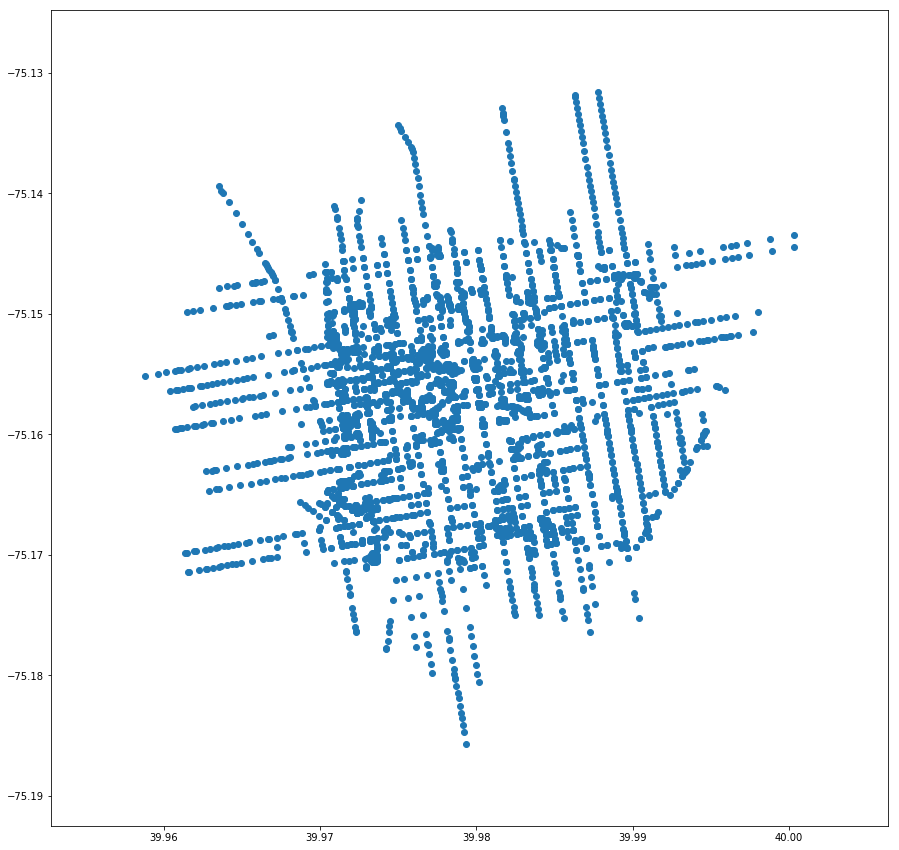

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
plt.scatter(lng_list,lat_list)
plt.show()

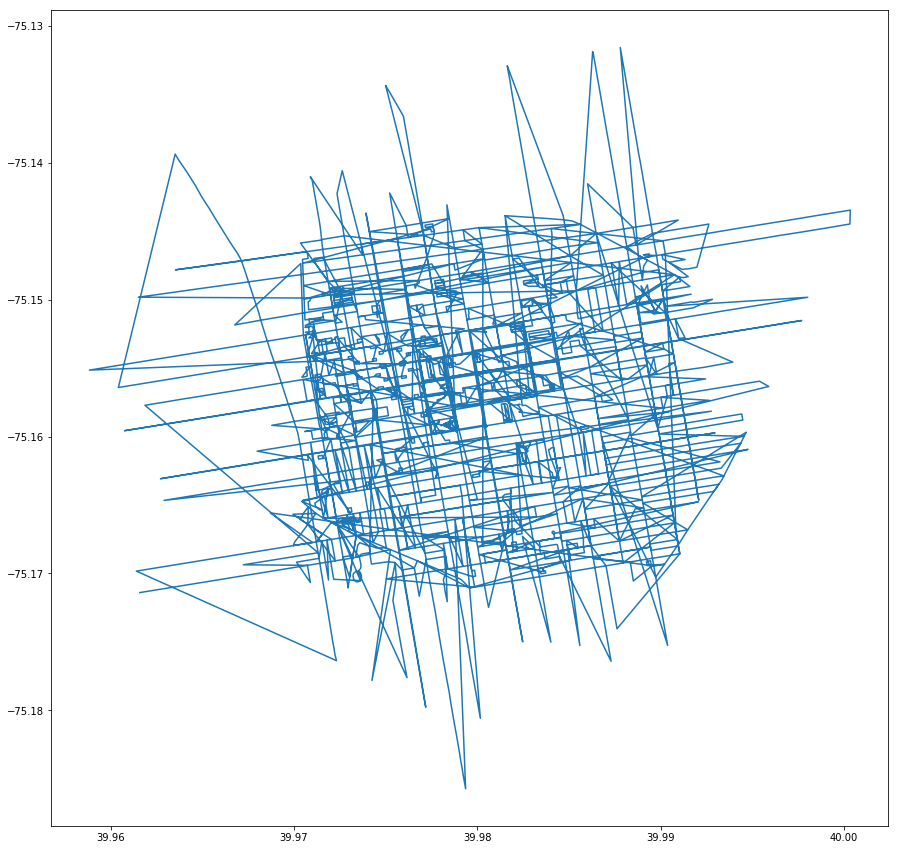

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
plt.plot(lng_list,lat_list)
plt.show()

In [26]:
import pandas as pd

In [27]:
d = {'lat': lng_list, 'lng': lat_list}
df_lat_lng = pd.DataFrame(data=d)

In [28]:
import folium
from folium import plugins

def show_map(df):
    map_TU = folium.Map(location=[39.980891, -75.157219],
                        zoom_start = 14.5) 
    for i in range(0,len(df)):
        folium.Marker([df['lat'].iloc[i],df['lng'].iloc[i]]).add_to(map_TU)
    return map_TU

In [29]:
show_map(df_lat_lng);

In [30]:
new_nodes = json.load(open('nodes.json.txt'))

In [31]:
new_nodes['nodes']

[{'lon': -75.1714019, 'lat': 39.961589},
 {'lon': -75.1713906, 'lat': 39.961641},
 {'lon': -75.1712568, 'lat': 39.9622554},
 {'lon': -75.1711635, 'lat': 39.9626839},
 {'lon': -75.1711455, 'lat': 39.9627662},
 {'lon': -75.1710584, 'lat': 39.9631663},
 {'lon': -75.1709701, 'lat': 39.963572},
 {'lon': -75.1709443, 'lat': 39.9636903},
 {'lon': -75.1708612, 'lat': 39.9640718},
 {'lon': -75.1707988, 'lat': 39.9643587},
 {'lon': -75.1707386, 'lat': 39.964635},
 {'lon': -75.170665, 'lat': 39.9649731},
 {'lon': -75.1705156, 'lat': 39.9656589},
 {'lon': -75.1703662, 'lat': 39.966345},
 {'lon': -75.1702969, 'lat': 39.9666631},
 {'lon': -75.170247, 'lat': 39.9668921},
 {'lon': -75.1701693, 'lat': 39.967249},
 {'lon': -75.1697706, 'lat': 39.9690796},
 {'lon': -75.1695305, 'lat': 39.9701823},
 {'lon': -75.1694107, 'lat': 39.9707323},
 {'lon': -75.1692631, 'lat': 39.9714098},
 {'lon': -75.1691959, 'lat': 39.9717185},
 {'lon': -75.1691341, 'lat': 39.9720024},
 {'lon': -75.1690803, 'lat': 39.9722494},


In [32]:
type(new_nodes['nodes'][0])

dict

In [33]:
len(new_nodes['nodes'])

3420

In [34]:
n_lat = []
n_lng = []
for i in range(len(new_nodes['nodes'])):
    print(new_nodes['nodes'][i])
    n_lng.append(new_nodes['nodes'][i]['lon'])
    n_lat.append(new_nodes['nodes'][i]['lat'])

{'lon': -75.1714019, 'lat': 39.961589}
{'lon': -75.1713906, 'lat': 39.961641}
{'lon': -75.1712568, 'lat': 39.9622554}
{'lon': -75.1711635, 'lat': 39.9626839}
{'lon': -75.1711455, 'lat': 39.9627662}
{'lon': -75.1710584, 'lat': 39.9631663}
{'lon': -75.1709701, 'lat': 39.963572}
{'lon': -75.1709443, 'lat': 39.9636903}
{'lon': -75.1708612, 'lat': 39.9640718}
{'lon': -75.1707988, 'lat': 39.9643587}
{'lon': -75.1707386, 'lat': 39.964635}
{'lon': -75.170665, 'lat': 39.9649731}
{'lon': -75.1705156, 'lat': 39.9656589}
{'lon': -75.1703662, 'lat': 39.966345}
{'lon': -75.1702969, 'lat': 39.9666631}
{'lon': -75.170247, 'lat': 39.9668921}
{'lon': -75.1701693, 'lat': 39.967249}
{'lon': -75.1697706, 'lat': 39.9690796}
{'lon': -75.1695305, 'lat': 39.9701823}
{'lon': -75.1694107, 'lat': 39.9707323}
{'lon': -75.1692631, 'lat': 39.9714098}
{'lon': -75.1691959, 'lat': 39.9717185}
{'lon': -75.1691341, 'lat': 39.9720024}
{'lon': -75.1690803, 'lat': 39.9722494}
{'lon': -75.1689884, 'lat': 39.9726716}
{'lon': 

{'lon': -75.1481089, 'lat': 39.983604}
{'lon': -75.1477659, 'lat': 39.98519}
{'lon': -75.1473049, 'lat': 39.98731}
{'lon': -75.1472129, 'lat': 39.987746}
{'lon': -75.1470929, 'lat': 39.988278}
{'lon': -75.1469789, 'lat': 39.988802}
{'lon': -75.1469289, 'lat': 39.989039}
{'lon': -75.1517547, 'lat': 39.981742}
{'lon': -75.151956, 'lat': 39.9817692}
{'lon': -75.1519667, 'lat': 39.9818185}
{'lon': -75.1518313, 'lat': 39.9824084}
{'lon': -75.151897, 'lat': 39.9830167}
{'lon': -75.1505016, 'lat': 39.9827995}
{'lon': -75.1510387, 'lat': 39.9828811}
{'lon': -75.1508911, 'lat': 39.9835295}
{'lon': -75.1503647, 'lat': 39.9834588}
{'lon': -75.1499411, 'lat': 39.9829732}
{'lon': -75.1503944, 'lat': 39.9830163}
{'lon': -75.1504964, 'lat': 39.9824614}
{'lon': -75.1500752, 'lat': 39.9824018}
{'lon': -75.1502806, 'lat': 39.9838641}
{'lon': -75.1502154, 'lat': 39.9830419}
{'lon': -75.1501489, 'lat': 39.9830358}
{'lon': -75.1501265, 'lat': 39.9830836}
{'lon': -75.1499543, 'lat': 39.9830562}
{'lon': -75.

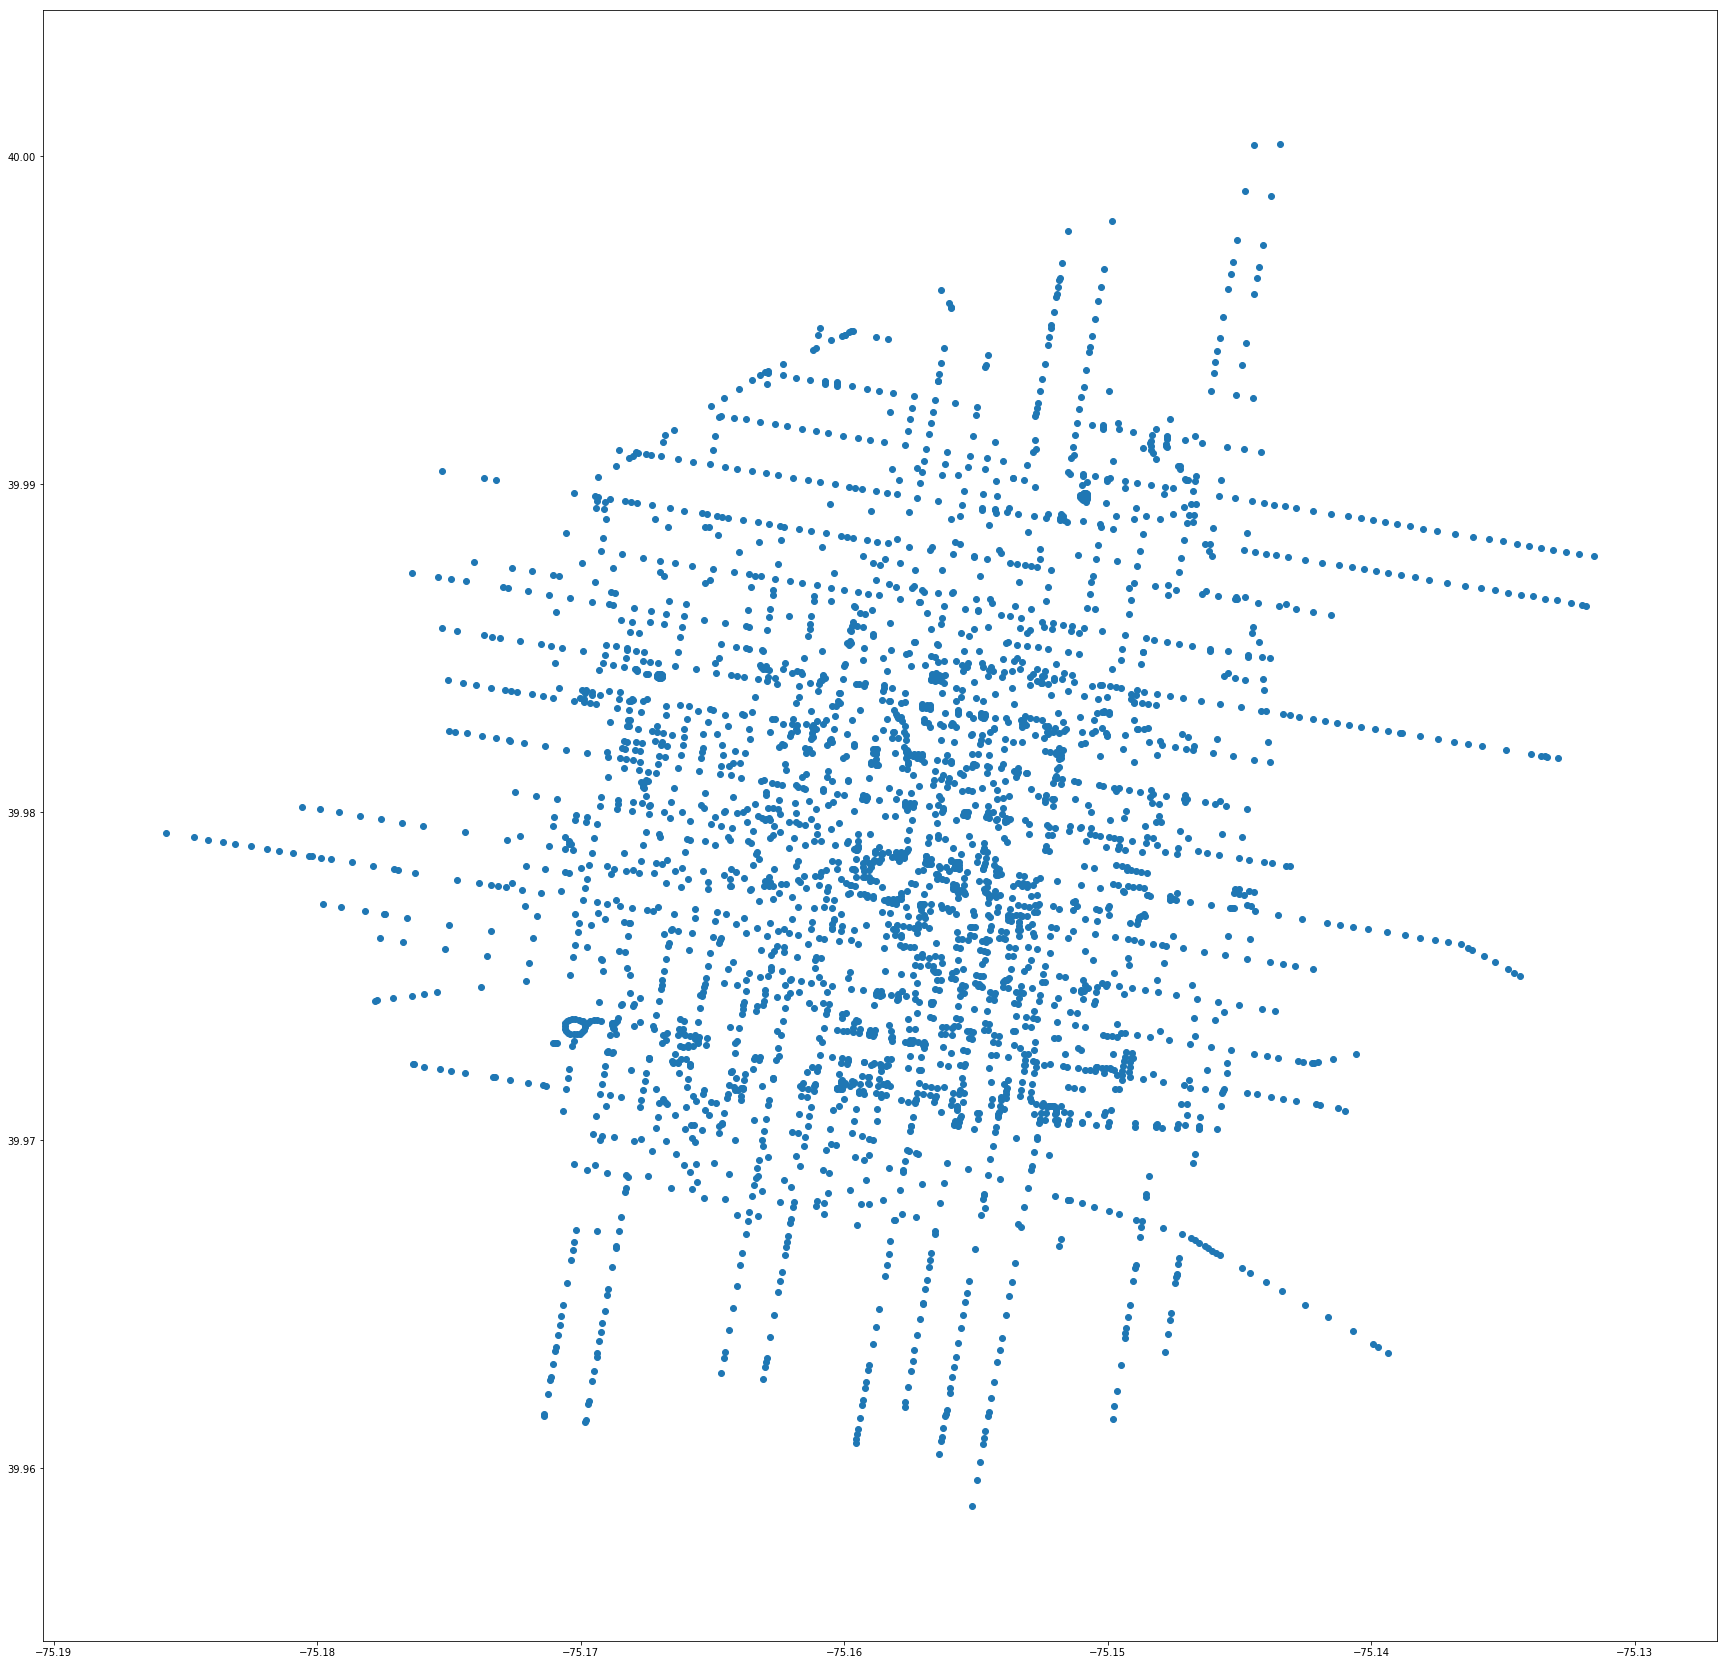

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 30))
plt.scatter(n_lng,n_lat)
plt.show()


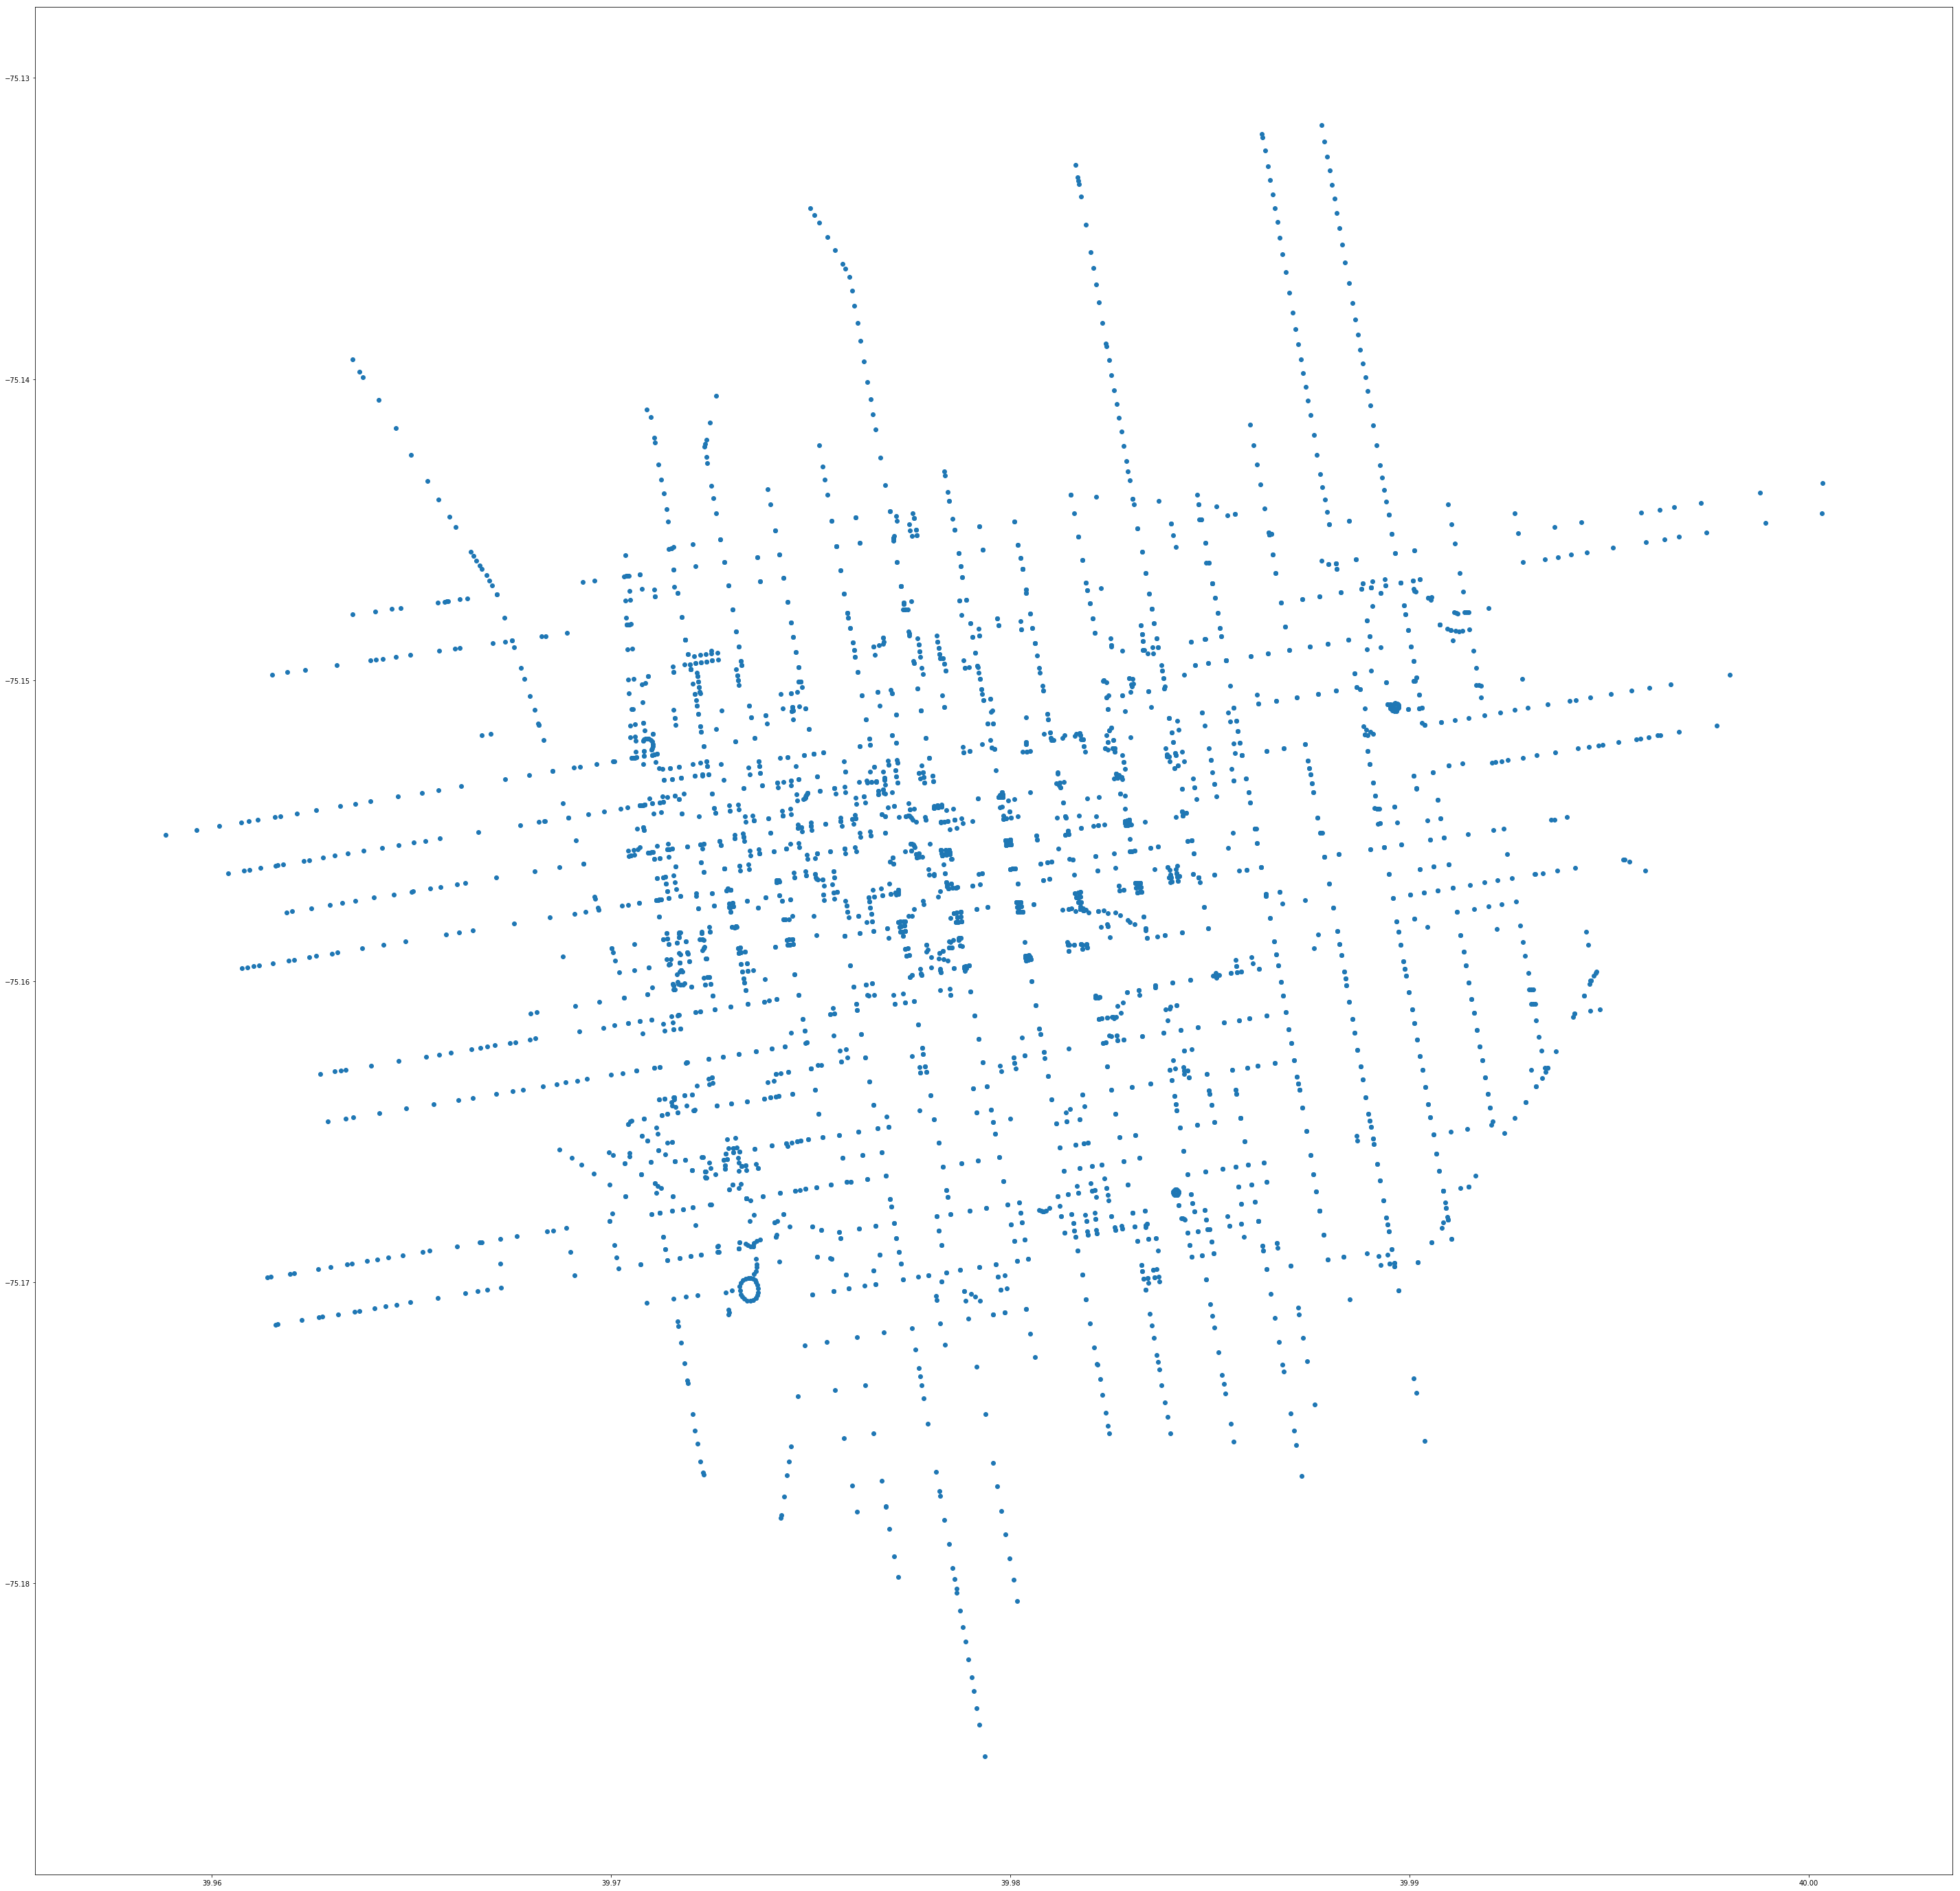

4215

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(50, 50))
plt.scatter(lng_list,lat_list)
plt.show()

len(lng_list)

In [37]:
n_lng

[-75.1714019,
 -75.1713906,
 -75.1712568,
 -75.1711635,
 -75.1711455,
 -75.1710584,
 -75.1709701,
 -75.1709443,
 -75.1708612,
 -75.1707988,
 -75.1707386,
 -75.170665,
 -75.1705156,
 -75.1703662,
 -75.1702969,
 -75.170247,
 -75.1701693,
 -75.1697706,
 -75.1695305,
 -75.1694107,
 -75.1692631,
 -75.1691959,
 -75.1691341,
 -75.1690803,
 -75.1689884,
 -75.1689847,
 -75.1689802,
 -75.1688739,
 -75.1672215,
 -75.1674142,
 -75.1674181,
 -75.167422,
 -75.1675171,
 -75.167569,
 -75.1676291,
 -75.1676997,
 -75.1677404,
 -75.1679678,
 -75.1682034,
 -75.1682766,
 -75.1683088,
 -75.1684736,
 -75.168565,
 -75.1686667,
 -75.1686778,
 -75.1688003,
 -75.1689489,
 -75.168988,
 -75.1690972,
 -75.1691762,
 -75.1692342,
 -75.1692934,
 -75.1693744,
 -75.1694016,
 -75.1694917,
 -75.1695578,
 -75.1696905,
 -75.1697123,
 -75.169815,
 -75.1698333,
 -75.1763786,
 -75.1763163,
 -75.1759538,
 -75.1753478,
 -75.1749358,
 -75.1743779,
 -75.1733424,
 -75.1732699,
 -75.1726791,
 -75.1719994,
 -75.1714471,
 -75.1713017,